<a href="https://colab.research.google.com/github/moronjie/BlogAPI/blob/main/finalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Augmented Images/Augmented Images/Others_augmented/NM04_01_13.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_00.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_01.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_02.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_03.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_04.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_05.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_06.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_07.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_08.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_09.jpg  
  inflating: Augmented Images/Augmented Images/Others_augm

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt


In [4]:
# Specify the directory containing your small dataset
dataset_directory = '/content/Fold1/Fold1/Fold1'

# Specify the target image dimensions
image_width, image_height = 150, 150

# Specify the batch size and number of epochs
batch_size = 16
num_epochs = 3

In [5]:
# Create data generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 2451 images belonging to 3 classes.
Found 611 images belonging to 3 classes.


In [6]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(image_width, image_height, 3)
)


58889256/58889256 [==============================] - 0s 0us/step


In [7]:
# Freeze the base model layers
base_model.trainable = False

# Build the model with VGG16 base and custom top layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/3
153/153 [==============================] - 794s 5s/step - loss: -50.2299 - accuracy: 0.8378 - val_loss: -147.2058 - val_accuracy: 0.8405
Epoch 2/3
153/153 [==============================] - 736s 5s/step - loss: -317.3029 - accuracy: 0.8398 - val_loss: -542.4363 - val_accuracy: 0.8405
Epoch 3/3
153/153 [==============================] - 719s 5s/step - loss: -813.1002 - accuracy: 0.8402 - val_loss: -1207.0735 - val_accuracy: 0.8405


In [9]:
# Evaluate the model on the test set (unseen data)
test_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 3062 images belonging to 3 classes.


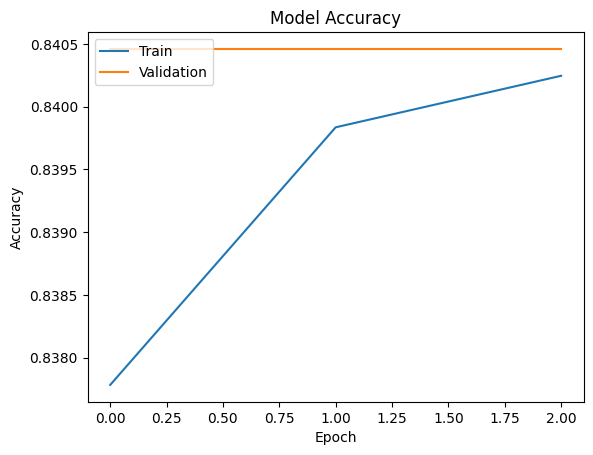

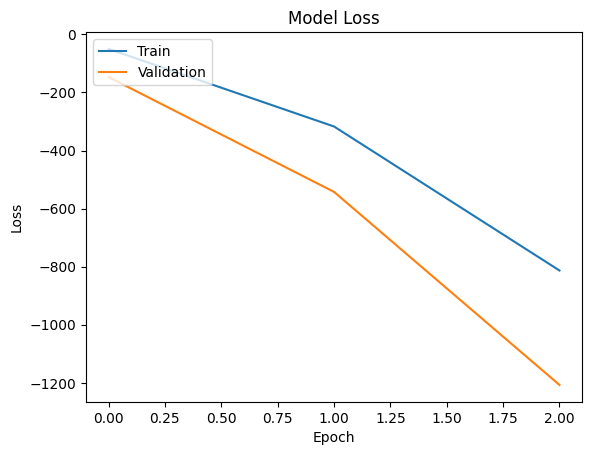

In [10]:
# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

192/192 [==============================] - 746s 4s/step - loss: -1178.7518 - accuracy: 0.8406
Test Loss: -1178.7518310546875
Test Accuracy: 0.8406270146369934


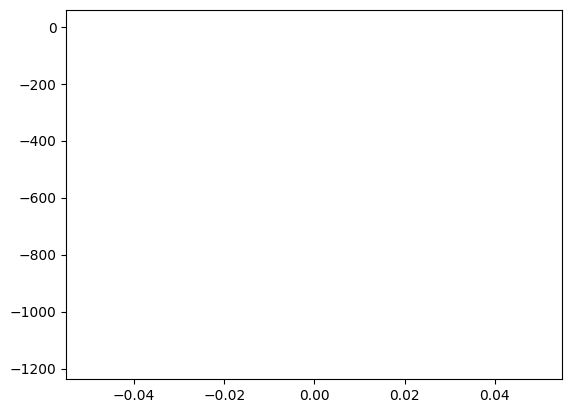

In [14]:
plt.plot(test_accuracy)
plt.plot(test_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()